In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torchvision.datasets import ImageFolder

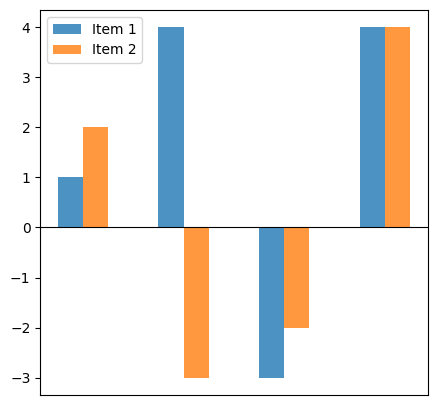

In [5]:
import matplotlib.pyplot as plt

item1_embedding = np.array([1, 4, -3, 4])
item2_embedding = np.array([2, -3, -2, 4])

def plot_embeddings(emb1, emb2):
    plt.figure(figsize=(5, 5))
    plt.bar(np.arange(len(emb1)), emb1, width=0.25, alpha=0.8, label='Item 1')
    plt.bar(np.arange(len(emb2)) + 0.25, emb2, width=0.25, alpha=0.8, label='Item 2')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks([])
    plt. legend()
    plt.show()
plot_embeddings(item1_embedding, item2_embedding)

In [22]:
embedding1 = np.array([
    [1, 2, 3, 4], 
    [2, 3, 4, 5],
    [3, 4, 5, 6]
])

embedding2 = np.array([
    [-1, 2, 3, 4], 
    [2, 3, 4, 5],
])

prod = np.matmul(embedding1, embedding2.T)

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0, keepdims=True)

prod1 = softmax(prod)

In [23]:
prod1

array([[1.12497423e-07, 6.91439436e-13],
       [3.35350093e-04, 8.31528028e-07],
       [9.99664537e-01, 9.99999168e-01]])

In [26]:
prod = np.array([[1],
                [0.5],
                [2]])
print(softmax(prod))

[[0.2312239 ]
 [0.14024438]
 [0.62853172]]


In [12]:
mult = item1_embedding * item2_embedding
plt.figure(figsize=(5, 5))
plt.bar(np.arange(len(prod)), mult, width=0.25, alpha=0.8, label='Item 1')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

TypeError: object of type 'Softmax' has no len()

<Figure size 500x500 with 0 Axes>

In [5]:
class Linear_mod (nn.Module):
    def __init__(self):
        super(Linear_mod, self).__init__()
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=4, out_features=2),
            nn.Linear(in_features=2, out_features=4)
        )
    def forward(self, x):
        x = self.linear_layers(x)
        return x

In [6]:
sentence = "The quick brown fox jumps"
words = sentence.lower().split()  # ['the', 'quick', 'brown', 'fox', 'jumps']

# Create a vocabulary mapping
vocab = {word: idx for idx, word in enumerate(set(words))}
print(vocab)  # Example: {'the': 0, 'quick': 1, 'brown': 2, 'fox': 3, 'jumps': 4}

import torch
import torch.nn as nn

# Parameters
vocab_size = len(vocab)  # 5 unique words
embedding_dim = 6  # Small dimension for illustration

# Embedding layer
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

# Convert words to indices
indices = [vocab[word] for word in words]  # Example: [0, 1, 2, 3, 4]
input_tensor = torch.LongTensor(indices)  # Shape: [5]

# Generate embeddings
embeddings = embedding_layer(input_tensor)  # Shape: [5, 6]
print(embeddings)

{'jumps': 0, 'the': 1, 'quick': 2, 'brown': 3, 'fox': 4}
tensor([[ 5.5293e-01,  8.2214e-01,  6.0405e-04,  2.0501e+00, -6.5155e-01,
         -6.0880e-03],
        [-5.0345e-01, -3.8833e-01, -7.8911e-01,  1.0884e+00, -4.6244e-01,
         -2.9357e-01],
        [-1.9748e+00,  2.2314e-01,  4.4129e-01, -1.5996e+00, -7.3764e-01,
         -8.4445e-01],
        [-1.5607e+00, -1.3598e+00, -8.9191e-01,  3.0161e-01,  1.4953e-01,
         -3.0904e-01],
        [ 4.4853e-01,  3.3831e-01,  6.3405e-02, -5.5610e-01, -7.2167e-01,
         -2.4780e-01]], grad_fn=<EmbeddingBackward0>)
